In [ ]:
import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Activation, Dense, MaxPooling2D, Conv2D, ZeroPadding2D, Dropout
from keras.layers import Flatten, Input
from keras.models import Model, Sequential, load_model
from keras import utils
from keras.callbacks import TensorBoard, History
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator


In [4]:
# image dimension
img_width, img_height = 128, 128
train_data_dir = 'train'
validation_data_dir = 'validation'
nb_train_sample = 200
nb_validation_sample= 240
epochs = 10
batch_size = 8

In [5]:
tensorboardku = TensorBoard(log_dir='graphku')

In [6]:
# agmentasi gambar
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# train data generator 
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_width, img_height), 
                                                   batch_size=batch_size,
                                                   class_mode='binary')

# testing data generator
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                       target_size=(img_width, img_height),
                                                       batch_size=batch_size,
                                                       class_mode='binary')


Found 800 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [7]:
inputs = Input(shape=(img_width, img_height, 3))
conv_layer = Conv2D(16, (5, 5), strides=(3,3), activation='relu')(inputs) 
conv_layer = ZeroPadding2D(padding=(1,1))(conv_layer) 
conv_layer = Conv2D(32, (5, 5), strides=(3,3), activation='relu')(conv_layer) 
conv_layer = MaxPooling2D((2, 2))(conv_layer) 
conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer) 
conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer)

# Flatten Layer
flatten = Flatten()(conv_layer) 

# Fully Connected Layer
fc_layer = Dense(32, activation='relu')(flatten)
outputs = Dense(1, activation='sigmoid')(fc_layer)

male_female_net = Model(inputs=inputs, outputs=outputs)
male_female_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 16)        1216      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 44, 44, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
__________

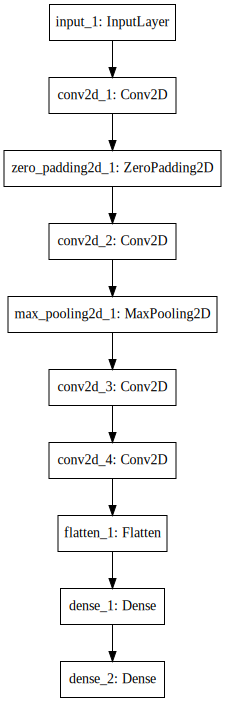

In [8]:
# visualisasi model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(male_female_net).create(prog='dot', format='svg'))

In [9]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
male_female_net.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [10]:
rekaman = male_female_net.fit_generator(train_generator,
                             steps_per_epoch=nb_train_sample,
                             epochs=epochs,
                             validation_data=validation_generator,
                             validation_steps=nb_validation_sample,
                             callbacks=[tensorboardku])

male_female_net.save('male_female_net_2.h5')

Epoch 1/10
200/200 [==============================] - 77s 387ms/step - loss: 0.6632 - acc: 0.5962 - val_loss: 0.6433 - val_acc: 0.6208
Epoch 2/10
200/200 [==============================] - 23s 117ms/step - loss: 0.6045 - acc: 0.6869 - val_loss: 0.5832 - val_acc: 0.6958
Epoch 3/10
200/200 [==============================] - 23s 113ms/step - loss: 0.5356 - acc: 0.7344 - val_loss: 0.6171 - val_acc: 0.7083
Epoch 4/10
200/200 [==============================] - 23s 114ms/step - loss: 0.4980 - acc: 0.7538 - val_loss: 0.5089 - val_acc: 0.7417
Epoch 5/10
200/200 [==============================] - 23s 113ms/step - loss: 0.4575 - acc: 0.7812 - val_loss: 0.5088 - val_acc: 0.7292
Epoch 6/10
200/200 [==============================] - 23s 115ms/step - loss: 0.4120 - acc: 0.8069 - val_loss: 0.6036 - val_acc: 0.7167
Epoch 7/10
200/200 [==============================] - 22s 110ms/step - loss: 0.3843 - acc: 0.8269 - val_loss: 0.6048 - val_acc: 0.7250
Epoch 8/10
200/200 [==============================] - 2

In [ ]:
rekaman.history

In [14]:
score = male_female_net.evaluate_generator(generator=validation_generator)

In [38]:
score

[0.5817446271578471, 0.7458333333333333]

In [15]:
validation_generator.reset()

In [31]:
prediksi = male_female_net.predict_generator(generator=validation_generator)

In [59]:
validation_generator.image_shape

(128, 128, 3)

In [62]:
predicted_class_indices=np.argmax(prediksi,axis=1)
predicted_class_indices[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

['1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female', '1female'

In [ ]:
print(predictions)

In [ ]:
# build VGG16 Net
keras.applications.VGG16(include_top='false', weights='imagenet')

male_female_net_vgg = male_female_net

## menggunakan arsitektu VGG16 pretrained model

In [ ]:
# Training data augmentation
train_datagen_vgg = ImageDataGenerator(rescale=1./255,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

test_datagen_vgg = ImageDataGenerator(rescale=1./255)

train_generator_vgg = train_datagen_vgg.flow_from_directory(train_data_dir,
                                                           terget_size=(img_width, img_height),
                                                           batch_size=batch_size,
                                                           class_mode='binary')

train_feature = male_female_net.predict_generator(train_generator_vgg, 
                                                  nb_train_sample,
                                                  verbose=1)

validation_datagen_gen = ImageDataGenerator(rescale=1./255)

validation_generator_vgg = validation_datagen_gen.flow_from_directory(validation_data_dir, 
                                                                      nb_validation_sample,
                                                                      batch_size=batch_size,
                                                                      class_mode='binary')
validation_feature = male_female_net.predict(validatin_generator_vgg,
                                            nb_validation_sample,
                                            verbose=1)

# simpan train dan validation feature
np.save('train_feature.npy', train_feature)
np.save('validation_feature.npy', validation_feature)